# Portfolio assignment 17
**Train a decision tree to predict the body_mass_g of a penguin based on their characteristics:**

- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your decision tree model to make predictions for both the train and test set.

---

- Which depth and features did you add per cycle?
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
penguins_clean = penguins.dropna()

In [4]:
# Doel: body_mass_g
# Kenmerken: bill_length_mm, bill_depth_mm, flipper_length_mm
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X = penguins_clean[features]
y = penguins_clean['body_mass_g']

In [5]:
# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [7]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# RMSE (Root Mean Squared Error) berekenen
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train RMSE: 335.37
Test RMSE: 350.41


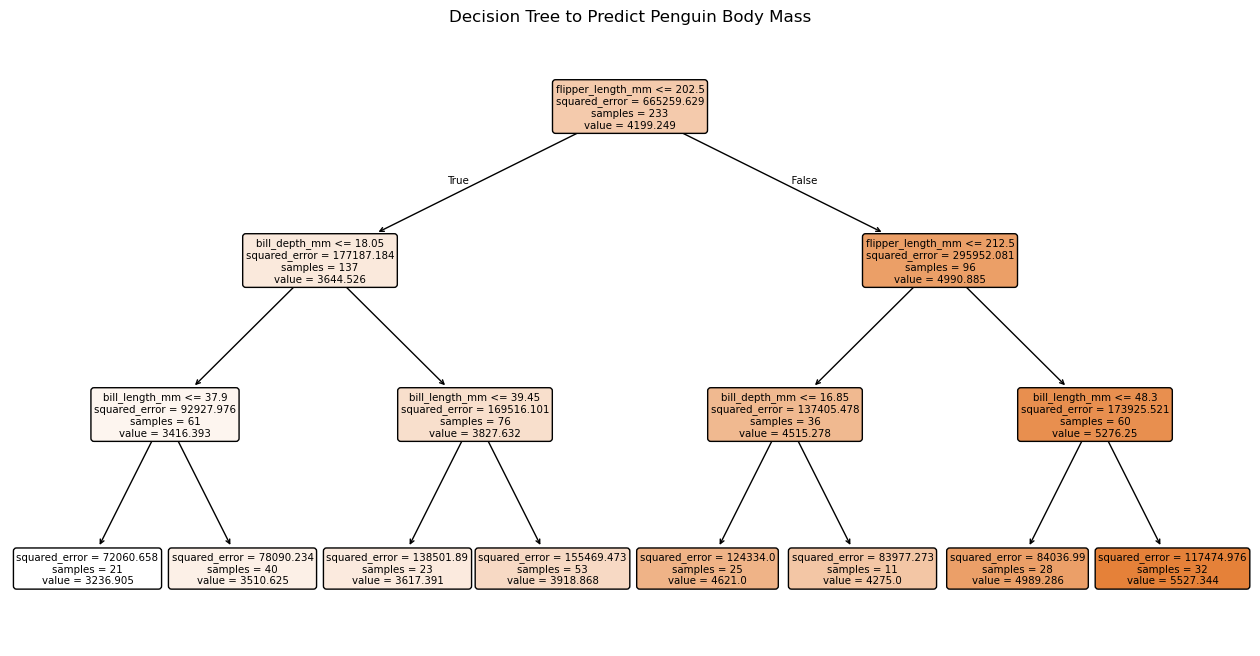

In [8]:
plt.figure(figsize=(16, 8))
plot_tree(regressor, feature_names=features, filled=True, rounded=True)
plt.title("Decision Tree to Predict Penguin Body Mass")
plt.show()

### Findings:
**Welke depth en features zijn toegevoegd per cyclus?**
- Max depth = 3 → dat betekent dat de boom maximaal 3 splitsingen maakt per pad.

De splitsingen worden vaak gedaan op:
- flipper_length_mm (sterke voorspellende variabele)
- bill_length_mm
- bill_depth_mm

**RMSE verschillen – Verwacht?**
- Train RMSE < Test RMSE — dat is normaal.
- Trainset wordt "geleerd" door het model, dus die fout is lager.
- Testset toont hoe goed het model generaliseert → iets hogere fout is verwacht.

**Begrijp je de boom?**
- Ja, De boom splitst op basis van metingen (zoals flipper length), en geeft uiteindelijk een gemiddelde body_mass_g per node.
- Elke splitsing reduceert de variatie in gewicht.
- Bijvoorbeeld: als flipper_length_mm > 205, dan neemt het gewicht sterk toe — dit komt overeen met grotere pinguïnsoorten.